In [16]:
import pandas as pd
import numpy as np
import wfdb
import os
import heartpy as hp
import matplotlib.pyplot as plt


files = os.listdir("C:/Users/kuziv/Desktop/UCU/Signals/fantasia-database-1.0.0/fantasia-database-1.0.0/")
files = [s.replace('.dat', '') for s in files if ".dat" in s]

# dfs_ecg = []
# dfs_rpeaks = []


# for i, participant in enumerate(files):

#     data, info = wfdb.rdsamp("C:/Users/kuziv/Desktop/UCU/Signals/fantasia-database-1.0.0/fantasia-database-1.0.0/" + participant)
    
#     # Get signal
#     data = pd.DataFrame(data, columns=info["sig_name"])
# #     temp=data[["RESP"]]
#     data = data[["ECG"]]
# #     data["Resp"]=temp
# #     data["Participant"] = participant
#     print(range(len(data)))

#     # Get annotations
#     anno = wfdb.rdann("C:/Users/kuziv/Desktop/UCU/Signals/fantasia-database-1.0.0/fantasia-database-1.0.0/" + participant, 'ecg')
#     anno = anno.sample[np.where(np.array(anno.symbol) == "N")[0]]
#     anno = pd.DataFrame({"Rpeaks": anno})
#     anno["Participant"] =  participant

#     # Store with the rest
#     dfs_ecg.append(data)
#     dfs_rpeaks.append(anno)



# # Save
# df_ecg = pd.concat(dfs_ecg).to_csv("ECGs.csv", index=False)
# dfs_rpeaks = pd.concat(dfs_rpeaks).to_csv("Rpeaks.csv", index=False)

In [13]:
import pandas as pd
data = pd.read_csv("ECGs.csv")
data.head()

,ECG,Resp,Participant,Sample
0,8.460,8.488,f1o01,0
1,8.592,8.452,f1o01,1
2,8.352,8.488,f1o01,2
3,8.152,8.496,f1o01,3
4,8.340,8.508,f1o01,4


In [4]:
print(max(data["Sample"]))

2342527


In [14]:
datar = pd.read_csv("Rpeaks.csv")
datar.head()

,Rpeaks,Participant
0,167,f1o01
1,415,f1o01
2,660,f1o01
3,907,f1o01
4,1157,f1o01


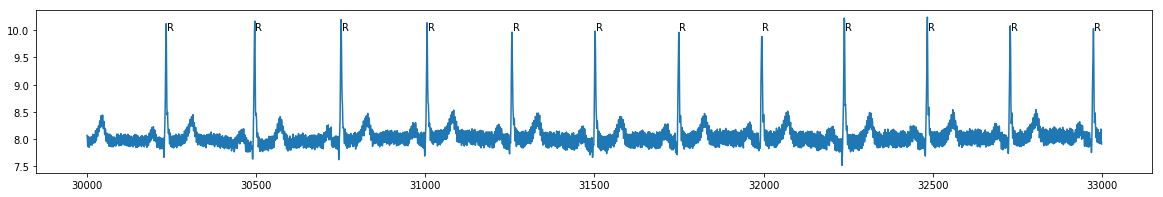

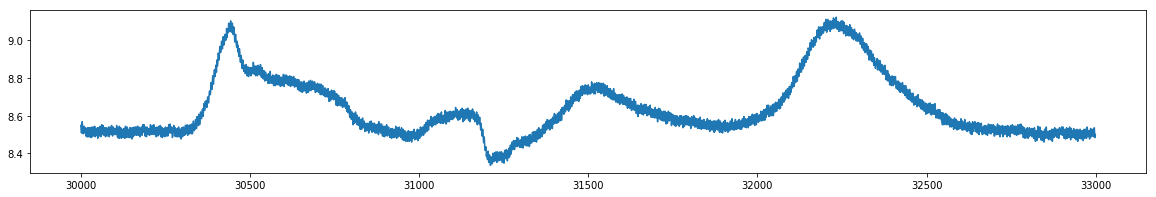

In [4]:
plt.figure(figsize=(20,3))
plt.plot(data[data["Participant"]=="f1o01"]["ECG"][30000:33000])
pea=datar[datar["Participant"]=="f1o01"]["Rpeaks"]
for x in pea:
    if x>30000 and x<33000:
        plt.annotate(s='R',xy=(x,10))
plt.show()
plt.figure(figsize=(20,3))
plt.plot(data[data["Participant"]=="f1o01"]["Resp"][30000:33000])


In [17]:
patients={}
for i, participant in enumerate(files):
    patients[participant]=data[data["Participant"]==participant]

In [24]:
young = df[10:20]
young = young.append(df[30:])
young

,Participant,Bach,Tchaikovsky,Dukas,Stravinsky,Soundtrack,Beethoven,Ponchielli
10,f1y01,77.560976,75.260870,71.612903,71.578947,70.278884,70.000000,70.187266
11,f1y02,60.000000,59.804348,59.612903,57.324561,55.697211,55.948276,55.955056
12,f1y03,66.731707,65.021739,62.400000,63.771930,62.749004,61.465517,61.123596
13,f1y04,45.756098,46.108696,42.812903,44.649123,46.374502,45.387931,45.992509
14,f1y05,61.853659,60.326087,57.522581,57.192982,56.414343,54.655172,52.584270
15,f1y06,58.536585,57.326087,58.451613,58.684211,58.565737,58.189655,58.052434
16,f1y07,53.268293,50.413043,49.858065,49.561404,45.776892,47.198276,47.640449
17,f1y08,62.146341,61.695652,61.470968,60.964912,58.326693,57.241379,57.752809
18,f1y09,69.853659,70.760870,65.883871,64.824561,63.466135,65.775862,65.318352
19,f1y10,75.121951,75.652174,71.070968,72.719298,73.266932,67.068966,71.385768


In [25]:
old = df[:10]
old = old.append(df[20:30])

In [ ]:
young_mean= young.mean()
old_mean= old.mean()
all_mean = df.mean()
bpm_s=[109,123,111,106,128,93,117]
res ={"song_bpm":bpm_s , "Old_mean":old.mean(), "Young_mean":young.mean(),"All_mean":all_mean}
stat=pd.DataFrame(data = res)
stat = stat.sort_values(by=['song_bpm'])
boxplot = stat.sort_values(by=['song_bpm'])['song_bpm'].plot.bar(figsize=(20,3),rot=0)
plt.title("Songs")
plt.show()
boxplot = stat.sort_values(by=['All_mean'])['All_mean'].plot.bar(figsize=(20,3),rot=0, color="#999999")
plt.title("All_mean")
plt.show()
boxplot = stat.sort_values(by=['Young_mean'])['Young_mean'].plot.bar(figsize=(20,3),rot=0, color="#333333")
plt.title("Young_mean")
plt.show()
boxplot = stat.sort_values(by=['Old_mean'])['Old_mean'].plot.bar(figsize=(20,3),rot=0, color="#666666")
plt.title("Old_mean")
plt.show()
stat

In [ ]:
intergroup_variance = ((young_mean-all_mean).pow(2)+(old_mean-all_mean).pow(2))/2
intergroup_variance

In [ ]:
pvar_young = statistics.pvariance(young["Tchaikovsky"])
pvar_old = statistics.pvariance(old["Tchaikovsky"])
average_pvar = (pvar_young*20+pvar_old*20)/40

In [ ]:
all_pvar = average_pvar+intergroup_variance["Tchaikovsky"]
intergroup_variance["Tchaikovsky"]/all_pvar

In [19]:
segments={}
fs=250
segments["Bach"]=[]
segments["Tchaikovsky"]=[]
segments["Dukas"]=[]
segments["Stravinsky"]=[]
segments["Soundtrack"]=[]
segments["Beethoven"]=[]
segments["Ponchielli"]=[]
segments["Schubert"]=[]
for key in patients:
    segments["Bach"].append(patients[key][(4*60+10)*fs:(14*60+25)*fs])
    segments["Tchaikovsky"].append(patients[key][(14*60+25)*fs:(29*60+45)*fs])
    segments["Dukas"].append(patients[key][(29*60+45)*fs:(42*60+40)*fs])
    segments["Stravinsky"].append(patients[key][(42*60+40)*fs:(1*3600+5*60+28)*fs])
    segments["Soundtrack"].append(patients[key][(1*3600+5*60+28)*fs:(1*3600+13*60+50)*fs])
    segments["Beethoven"].append(patients[key][(1*3600+13*60+50)*fs:(1*3600+37*60+2)*fs])
    segments["Ponchielli"].append(patients[key][(1*3600+37*60+2)*fs:(1*3600+50*60+23)*fs])
    segments["Schubert"].append(patients[key][(1*3600+50*60+23)*fs:])


In [21]:
#одна пісня - один пацієнт
def bpm(data):
    rpeaks=datar[datar["Participant"]==data["Participant"].values[0]]
    minv=min(data['Sample'])
    maxv=max(data['Sample'])
    
    rs=[]
    for x in rpeaks['Rpeaks']:
        if x>=minv and x<=maxv:
            rs.append(x)
#     print("Кількість R-peaks: ",len(rs))
#     print("Довжина сигналу: ",len(data)/(250*60))
#     print("Частота: ",len(rs)/(len(data)/(250*60)))
    return len(rs)/(len(data)/(250*60))
print(bpm(segments["Beethoven"][2]))

58.44827586206897


In [22]:
result={"Participant":[participant for i, participant in enumerate(files)]}
print([participant for i, participant in enumerate(files)])
for key in segments:
    if key=="Schubert":
        break
    result[key]=[bpm(segments[key][pat]) for pat in range(40)]
    
df=pd.DataFrame(data=result)

['f1o01', 'f1o02', 'f1o03', 'f1o04', 'f1o05', 'f1o06', 'f1o07', 'f1o08', 'f1o09', 'f1o10', 'f1y01', 'f1y02', 'f1y03', 'f1y04', 'f1y05', 'f1y06', 'f1y07', 'f1y08', 'f1y09', 'f1y10', 'f2o01', 'f2o02', 'f2o03', 'f2o04', 'f2o05', 'f2o06', 'f2o07', 'f2o08', 'f2o09', 'f2o10', 'f2y01', 'f2y02', 'f2y03', 'f2y04', 'f2y05', 'f2y06', 'f2y07', 'f2y08', 'f2y09', 'f2y10']


In [30]:
old.mean()

Bach           59.565854
Tchaikovsky    58.222826
Dukas          57.507097
Stravinsky     56.883772
Soundtrack     56.760956
Beethoven      56.739224
Ponchielli     56.838487
dtype: float64

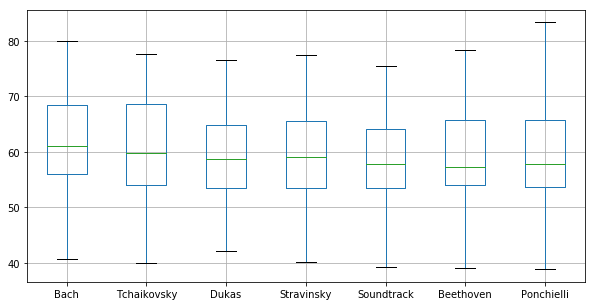

In [11]:
boxplot = df.boxplot(column=['Bach', 'Tchaikovsky', 'Dukas', 'Stravinsky', 'Soundtrack','Beethoven', 'Ponchielli'], figsize=(10,5))

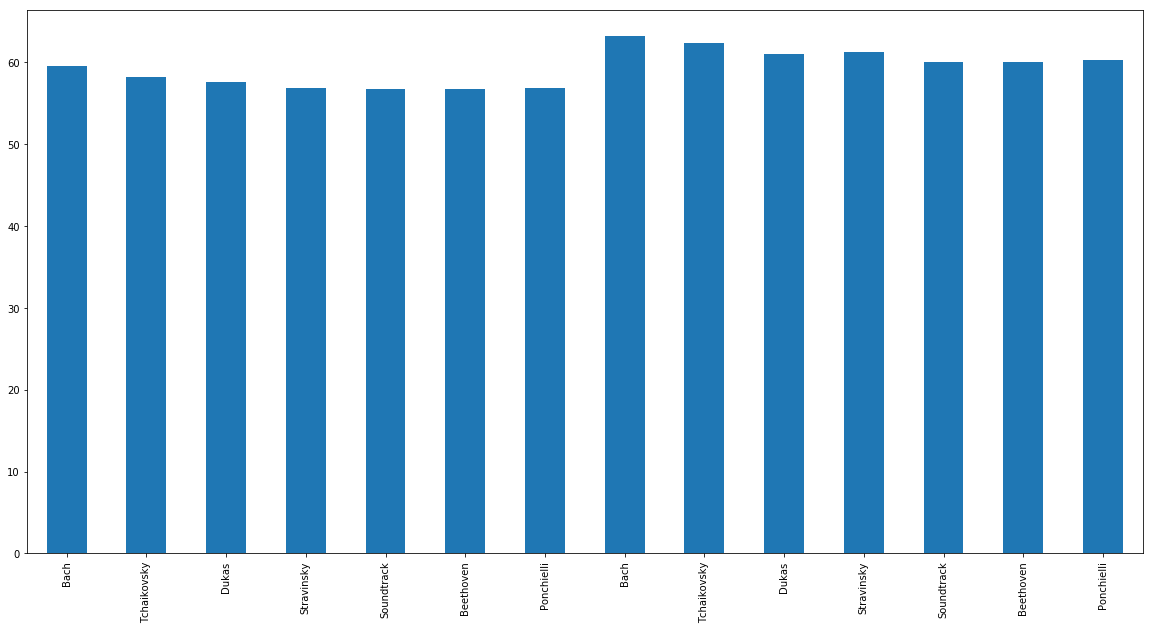

In [29]:
boxplot = old.mean().append(young.mean()).plot.bar(x="Participant",figsize=(20,10))

In [13]:
import statistics
def my_mean(df):
    return statistics.pvariance(df)

In [108]:
songs_bpm={}
songs_bpm["Bach"]=[109]
songs_bpm["Tchaikovsky"]=[123]
songs_bpm["Dukas"]=[111]
songs_bpm["Stravinsky"]=[106]
songs_bpm["Soundtrack"]=[128]
songs_bpm["Beethoven"]=[93]
songs_bpm["Ponchielli"]=[117]
df_songs=pd.DataFrame(data=songs_bpm)
df_songs=df_songs.pivot(columns="Bach")
df_songs

,Tchaikovsky,Dukas,Stravinsky,Soundtrack,Beethoven,Ponchielli
Bach,109,109,109,109,109,109
0,123,111,106,128,93,117


In [34]:
songs_bpm={}
songs_bpm["Bach"]=[135,old.mean(),young.mean()]
songs_bpm["Tchaikovsky"]=[123,old.mean(),young.mean()]
songs_bpm["Dukas"]=[116,df["Dukas"][10:11][10],df["Dukas"][:1][0]]
songs_bpm["Stravinsky"]=[115,df["Stravinsky"][10:11][10],df["Stravinsky"][:1][0]]
songs_bpm["Soundtrack"]=[128,df["Soundtrack"][10:11][10],df["Soundtrack"][:1][0]]
songs_bpm["Beethoven"]=[93,df["Beethoven"][10:11][10],df["Beethoven"][:1][0]]
songs_bpm["Ponchielli"]=[117,df["Ponchielli"][10:11][10],df["Ponchielli"][:1][0]]
songs_bpm
    
df_songs=pd.DataFrame(data=songs_bpm)
df["Bach"][10:11]

10    77.560976
Name: Bach, dtype: float64

In [81]:
songs_bpm={}
songs_bpm["Bach"]=[135, old.mean()["Bach"],young.mean()["Bach"]]
songs_bpm["Tchaikovsky"]=[123, old.mean()["Tchaikovsky"],young.mean()["Tchaikovsky"]]
songs_bpm["Dukas"]=[116,old.mean()["Dukas"],young.mean()["Dukas"]]
songs_bpm["Stravinsky"]=[115,old.mean()["Stravinsky"],young.mean()["Stravinsky"]]
songs_bpm["Soundtrack"]=[128,old.mean()["Soundtrack"],young.mean()["Soundtrack"]]
songs_bpm["Beethoven"]=[93,old.mean()["Beethoven"],young.mean()["Beethoven"]]
songs_bpm["Ponchielli"]=[117,old.mean()["Ponchielli"],young.mean()["Ponchielli"]]
songs_bpm
    
df_songs=pd.DataFrame(data=songs_bpm,index =["Song","Old","Young"] )

from sklearn.preprocessing import Normalizer
df_songs.iloc[:,:] = Normalizer(norm='l1').fit_transform(df_songs)
df_songs

,Bach,Tchaikovsky,Dukas,Stravinsky,Soundtrack,Beethoven,Ponchielli
Song,0.163241,0.148730,0.140266,0.139057,0.154776,0.112455,0.141475
Old,0.147983,0.144646,0.142868,0.141320,0.141015,0.140961,0.141207
Young,0.147701,0.145576,0.142464,0.143174,0.140156,0.140272,0.140658


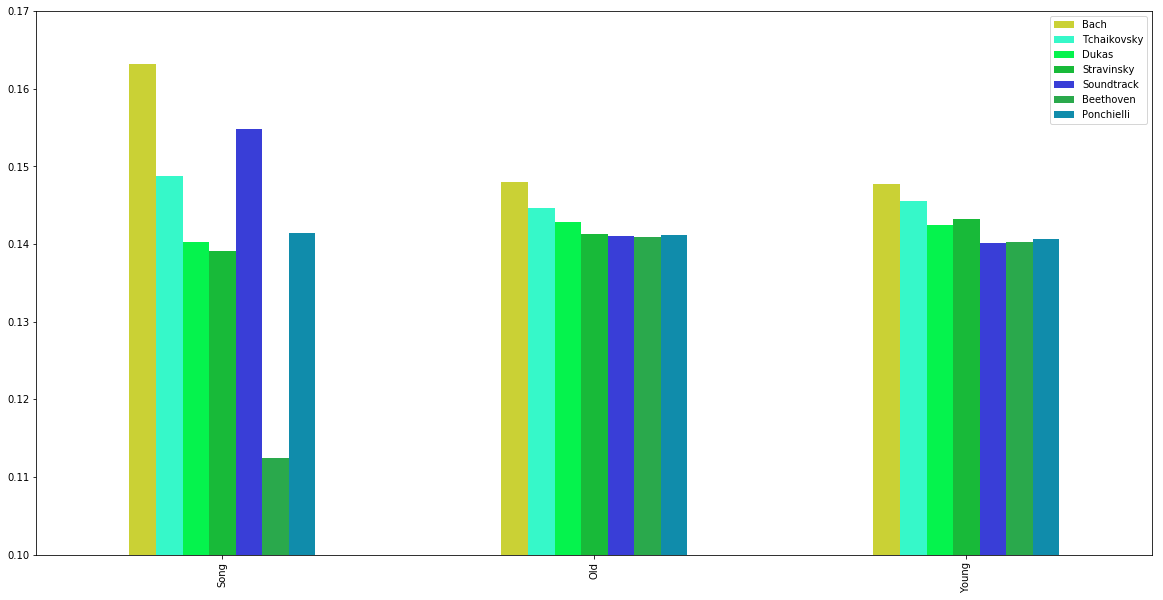

In [93]:

color_rectangle = np.random.rand(7, 3)  

boxplot = df_songs.plot.bar(figsize=(20,10),color = color_rectangle,ylim=[0.1, 0.17])

In [46]:
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import numpy as np
rate,input_data = read("C:/Users/kuziv/Desktop/UCU/Signals/Project/Materials/Tchaikovsky.wav")
audio1 = input_data
time = np.arange(0, float(audio1.shape[0]), 1) / rate
# plt.figure(figsize=(20,3))
# plt.plot(audio1)
# plt.ylabel("Amplitude")
# plt.xlabel("Time")
# plt.title("SoundWav")
# plt.show()

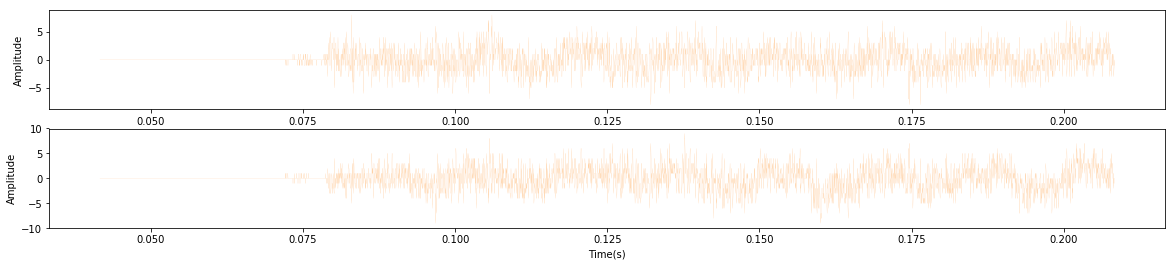

In [6]:

channel1=audio1[:,0] #left
channel2=audio1[:,1] #right
plt.figure(figsize=(20,4))
plt.subplot(211)
plt.plot(time[2000:10000], channel1[2000:10000], linewidth=0.1, alpha=0.7,  color='#ff7f00')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.subplot(212)
plt.plot(time[2000:10000], channel2[2000:10000], linewidth=0.1, alpha=0.7, color='#ff7f00')
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
fs=250
fig, _ = plot_audio(audio1[10000:11000], fs)

In [9]:
from numpy import fft as fft

fourier=fft.fft(channel1[2000:10000])

# plt.plot(fourier, color='#ff7f00')
# plt.xlabel('k')
# plt.ylabel('Amplitude')

c:\users\kuziv\appdata\local\programs\python\python37\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Power (dB)')

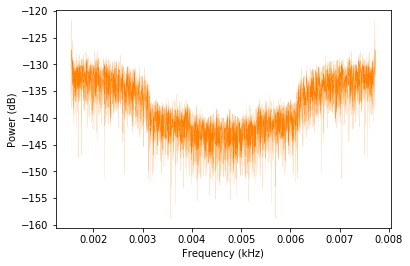

In [11]:
n = len(channel1)
fourier = fourier[0:int(n/2)]

# scale by the number of points so that the magnitude does not depend on the length
fourier = fourier / float(n)

#calculate the frequency at each point in Hz
freqArray = np.arange(0, (n/2), 1.0) * (rate*1.0/n);

plt.plot((freqArray/1000)[2000:10000], 10*np.log10(fourier), color='#ff7f00', linewidth=0.1)
plt.xlabel('Frequency (kHz)')
plt.ylabel('Power (dB)')

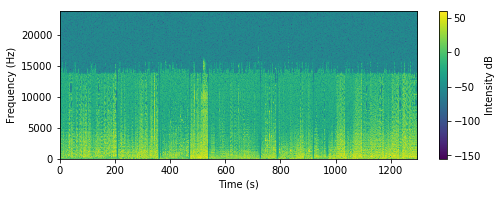

In [12]:
plt.figure(2, figsize=(8,6))
plt.subplot(211)
Pxx, freqs, bins, im = plt.specgram(channel1, Fs=rate, NFFT=1024, cmap=plt.get_cmap('autumn_r'))
cbar=plt.colorbar(im)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
cbar.set_label('Intensity dB')




In [99]:
min_val = np.mean([len(patients[ele]) for ele in patients]) 
print(min_val)
# res = [] 
# for ele in patients: 
#     if len(patients[ele]) == min_val: 
#         res.append(ele) 
# print(res)

1794908.4


591.2


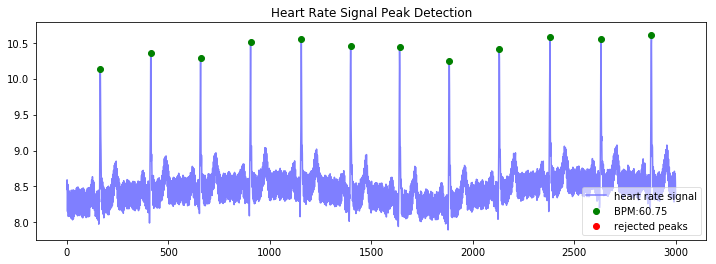

bpm: 60.751105
ibi: 987.636364
sdnn: 12.115150
sdsd: 7.756288
rmssd: 13.623509
pnn20: 0.100000
pnn50: 0.000000
hr_mad: 12.000000
sd1: 9.633276
sd2: 14.653327
s: 443.465777
sd1/sd2: 0.657412
breathingrate: 0.092047


In [31]:
print(min(data["Resp"]*100))

#run analysis
wd, m = hp.process(data['ECG'][:3000], 250)

#visualise in plot of custom size
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

#display computed measures
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

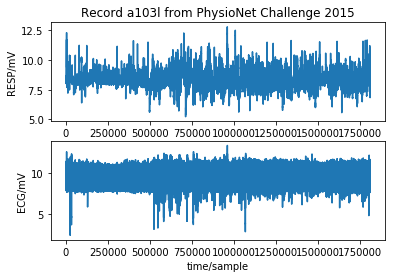

{'record_name': 'f1o09',
 'n_sig': 2,
 'fs': 250,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 1810175,
 'base_time': None,
 'base_date': None,
 'comments': ['Age: 71 Sex: M'],
 'sig_name': ['RESP', 'ECG'],
 'p_signal': array([[8.164, 8.22 ],
        [8.164, 8.252],
        [8.156, 8.152],
        ...,
        [7.38 , 8.952],
        [7.408, 8.984],
        [7.336, 8.988]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['f1o09.dat', 'f1o09.dat'],
 'fmt': ['16', '16'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [2000.0, 2000.0],
 'baseline': [0, 0],
 'units': ['mV', 'mV'],
 'adc_res': [16, 16],
 'adc_zero': [0, 0],
 'init_value': [16328, 16440],
 'checksum': [-12480, 7096],
 'block_size': [0, 0]}

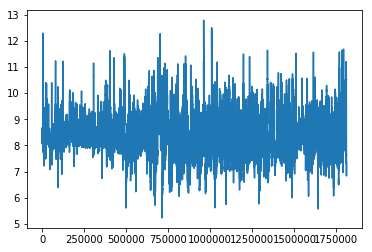

In [18]:
import wfdb
# Demo 1 - Read a WFDB record using the 'rdrecord' function into a wfdb.Record object.
# Plot the signals, and show the data.
record = wfdb.rdrecord('C:/Users/kuziv/Desktop/UCU/Signals/fantasia-database-1.0.0/fantasia-database-1.0.0/f1o09') 
wfdb.plot_wfdb(record=record, title='Record a103l from PhysioNet Challenge 2015') 
print(len(record.p_signal))
plt.plot(record.p_signal[:,0])
display(record.__dict__)


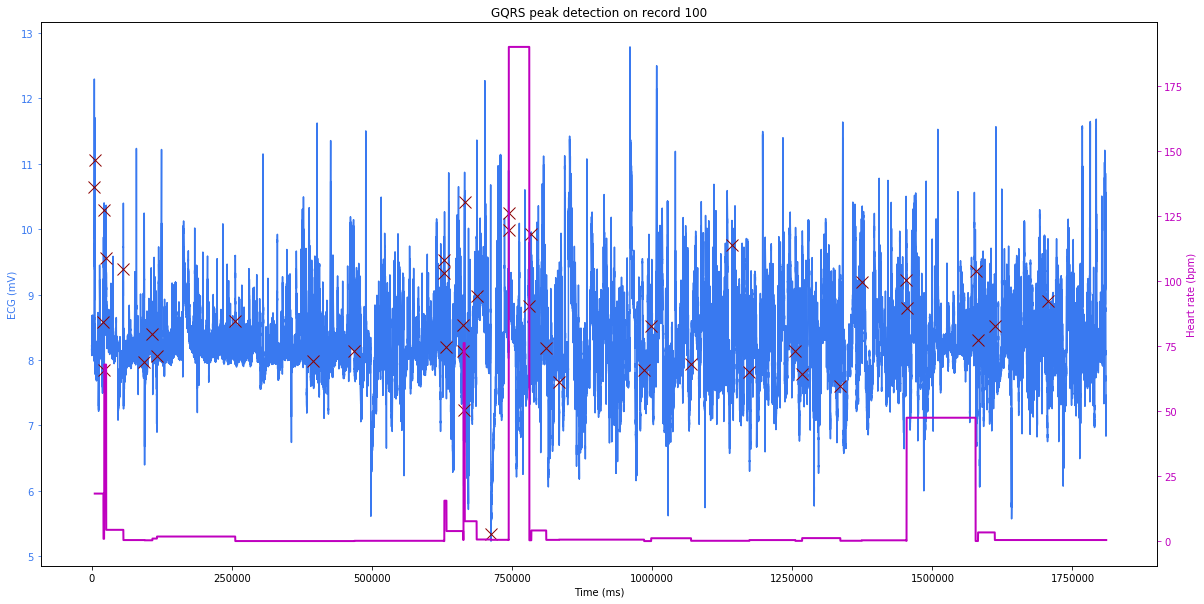

Corrected GQRS detected peak indices: [4707, 5503, 20994, 22161, 22365, 25831, 56527, 94163, 108266, 116390, 256051, 395363, 468688, 628181, 629177, 632931, 662832, 663403, 663528, 665595, 686755, 712480, 743951, 744071, 780767, 784298, 810982, 833824, 985508, 998178, 1069394, 1142698, 1173520, 1255333, 1267511, 1335672, 1373771, 1453582, 1453949, 1577038, 1581410, 1611264, 1706391]


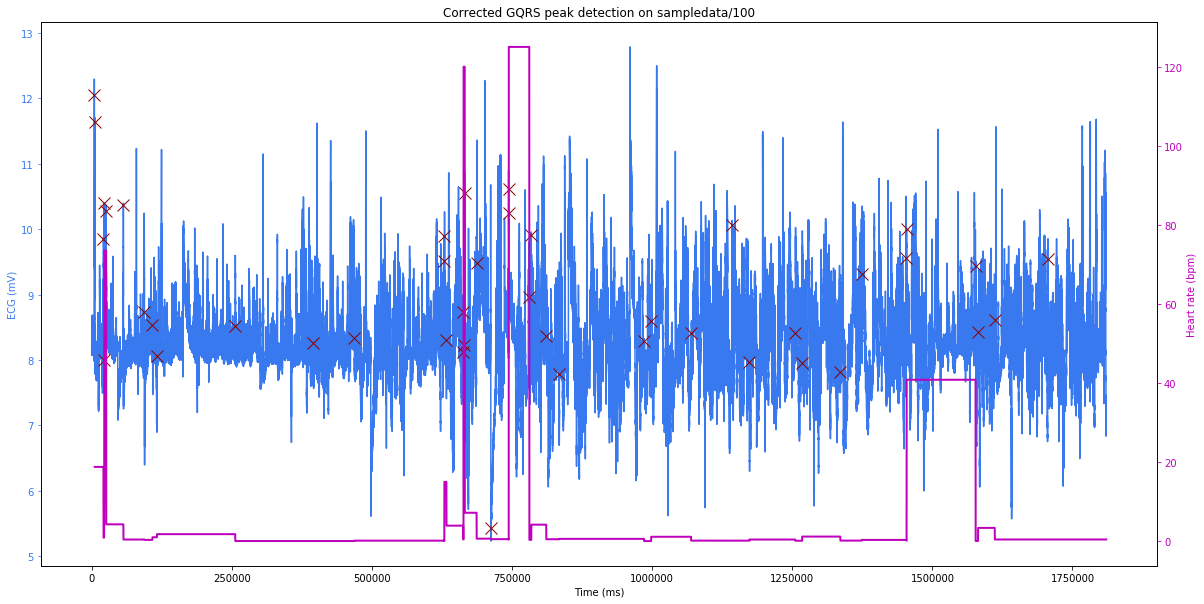

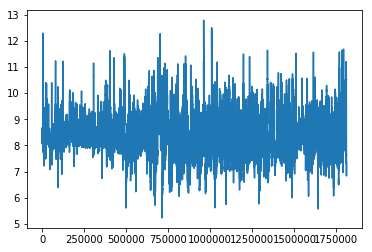

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import wfdb
from wfdb import processing
def peaks_hr(sig, peak_inds, fs, title, figsize=(20, 10), saveto=None):
    "Plot a signal with its peaks and heart rate"
    # Calculate heart rate
    hrs = processing.hr.compute_hr(sig_len=sig.shape[0], qrs_inds=peak_inds, fs=fs)
    
    N = sig.shape[0]
    
    fig, ax_left = plt.subplots(figsize=figsize)
    ax_right = ax_left.twinx()
    
    ax_left.plot(sig, color='#3979f0', label='Signal')
    ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x', 
                 color='#8b0000', label='Peak', markersize=12)
    ax_right.plot(np.arange(N), hrs, label='Heart rate', color='m', linewidth=2)

    ax_left.set_title(title)

    ax_left.set_xlabel('Time (ms)')
    ax_left.set_ylabel('ECG (mV)', color='#3979f0')
    ax_right.set_ylabel('Heart rate (bpm)', color='m')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax_left.tick_params('y', colors='#3979f0')
    ax_right.tick_params('y', colors='m')
    if saveto is not None:
        plt.savefig(saveto, dpi=600)
    plt.show()

# Load the WFDB record and the physical samples
record = wfdb.rdrecord('C:/Users/kuziv/Desktop/UCU/Signals/fantasia-database-1.0.0/fantasia-database-1.0.0/f1o09', sampfrom=0, channels=[0])

# Use the GQRS algorithm to detect QRS locations in the first channel
qrs_inds = processing.qrs.gqrs_detect(sig=record.p_signal[:,0], fs=record.fs).astype(int)

# Plot results
peaks_hr(sig=record.p_signal, peak_inds=qrs_inds, fs=record.fs, title="GQRS peak detection on record 100")
    
# Correct the peaks shifting them to local maxima
min_bpm = 20
max_bpm = 230
#min_gap = record.fs * 60 / min_bpm
# Use the maximum possible bpm as the search radius
search_radius = int(record.fs * 60 / max_bpm)
corrected_peak_inds = processing.peaks.correct_peaks(record.p_signal[:,0], 
                                                     peak_inds=qrs_inds,
                                                     search_radius=search_radius, 
                                                     smooth_window_size=150)

# Display results
print('Corrected GQRS detected peak indices:', sorted(corrected_peak_inds))
peaks_hr(sig=record.p_signal, peak_inds=sorted(corrected_peak_inds), fs=record.fs,
         title="Corrected GQRS peak detection on sampledata/100")
plt.plot(record.p_signal)